### Reads the rhd file to look at its header

In [1]:
# Dependencies (Needs songephys environment)
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing.sharedctypes import copy as mpcopy

# Two different ways to read the files - higher level (slighlty)
from neo.io import RHDIO, NixIO

# Lower level (slightly)
from intanutil import read_header, load_intan_rhd_format

In [2]:
print(mp.cpu_count())

32


In [3]:
# Filename and header
filename = '/Volumes/GoogleDrive/My Drive/PowerData/local_raw_storage/HpiWhi5668M/HpiWhi5668M__221023_072823.rhd'
#filename = '/Users/frederictheunissen/Google Drive/Power Data/birds/ZF6M/sessions/ZF6M_6_5t_190719_094702/raw/ZF6M_6_5t_190719_094702.rhd'
#fileout = '/Users/frederictheunissen/Google Drive/Data/birds/ZF6M/sessions/ZF6M_6_5t_190719_094702/raw/ZF6M_6_5t_190719_094702.nix'
#filepkl = '/Users/frederictheunissen/Google Drive/Data/birds/ZF6M/sessions/ZF6M_6_5t_190719_094702/raw/ZF6M_6_5t_190719_094702.pkl'
with open(filename, "rb") as fid:
    header = read_header.read_header(fid)
sorted(header.keys())




Reading Intan Technologies RHD2000 Data File, Version 3.0



KeyboardInterrupt: 

In [4]:
%debug

> /Users/frederictheunissen/Code/songephys/src/intanutil/intanutil/qstring.py(29)read_qstring()
     27     data = []
     28     for i in range(0, length):
---> 29         c, = struct.unpack('<H', fid.read(2))
     30         data.append(c)
     31 

ipdb> u
> /Users/frederictheunissen/Code/songephys/src/intanutil/intanutil/read_header.py(86)read_header()
     84     for signal_group in range(0, number_of_signal_groups):
     85         signal_group_name = read_qstring(fid)
---> 86         signal_group_prefix = read_qstring(fid)
     87         (signal_group_enabled, signal_group_num_channels, signal_group_num_amp_channels) = struct.unpack('<hhh', fid.read(6))
     88 

ipdb> number_of_signal_groups     
6
ipdb> q


In [4]:
rhd = RHDIO(filename)
storeDIG=False   # Set to False for Seewiesen data that does not have digital io stored.

blk = rhd.read_block(storeDIG)
    


Reading Intan Technologies RHD2000 Data File, Version 1.4


Reading Intan Technologies RHD2000 Data File, Version 1.4

Found 32 amplifier channels.
Found 0 auxiliary input channels.
Found 3 board ADC channels.
Found 1 board digital input channel.
Found 0 supply voltage channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 5400.000 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 462.0 seconds


In [5]:
nix = NixIO(fileout)
nix.write_block(blk)
nix.close()

Multidimensional arrays and nested containers are not currently supported when writing to NIX.
Multidimensional arrays and nested containers are not currently supported when writing to NIX.
Multidimensional arrays and nested containers are not currently supported when writing to NIX.
Multidimensional arrays and nested containers are not currently supported when writing to NIX.


In [5]:
seg = blk.segments[0]

In [6]:
elecsignals = seg.analogsignals[0]
soundsignals = seg.analogsignals[1]

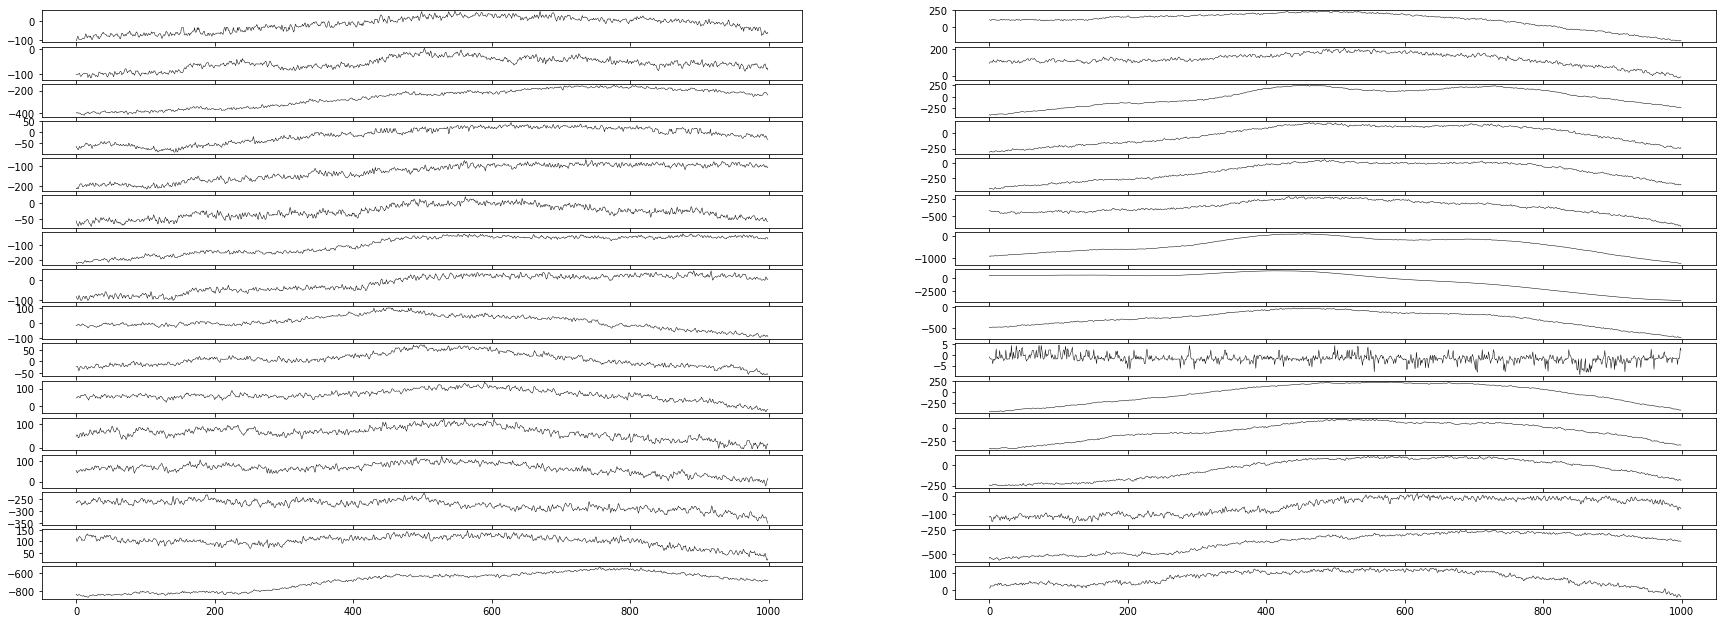

In [14]:
import matplotlib.gridspec as gridspec
fig = plt.figure(1, figsize=(30,15))
gs = gridspec.GridSpec(220, 2)
    
for iplt in range(32):
        # subplot(9, 2, iplt+3)
        if iplt < 16:
            ax = fig.add_subplot(gs[20+10*iplt:20+10*iplt+9,0])
        else:
            isub = iplt%16;
            ax = fig.add_subplot(gs[20+10*isub:20+10*isub+9,1])
        ax.plot(elecsignals[28000:29000,iplt], linewidth = 0.5, color = 'black')



(162000000, 3)